In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

Fit.statMethod = "cstat2"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
spec = Spectrum(glob.glob("*cash.fits")[0],backFile=glob.glob("*bkg.fits")[0],respFile=glob.glob("*.rmf")[0])



1 spectrum  in use
 
Spectral Data File: 0886011001_MOS10spec_cash.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.936e-03 +/- 5.396e-04 (35.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-203
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 2.13e+04 sec
 Using fit statistic: cstat2
 Using Background File                0886011001_MOS10spec_bkg.fits
  Background Exposure Time: 2.13e+04 sec
 Using Response (RMF) File            0886011001_MOS10spec.rmf for Source 1

Net count rate (cts/s) for Spectrum:1  1.936e-03 +/- 5.396e-04 (35.9 % total)
Response successfully loaded.
Spectrum 1  Spectral Data File: 0886011001_MOS10spec_cash.fits
Net count rate (cts/s) for Spectrum:1  1.936e-03 +/- 5.396e-04 (35.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-203
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 2.13e+04 sec
 Using fit statistic: cstat2
 Using Background File                08

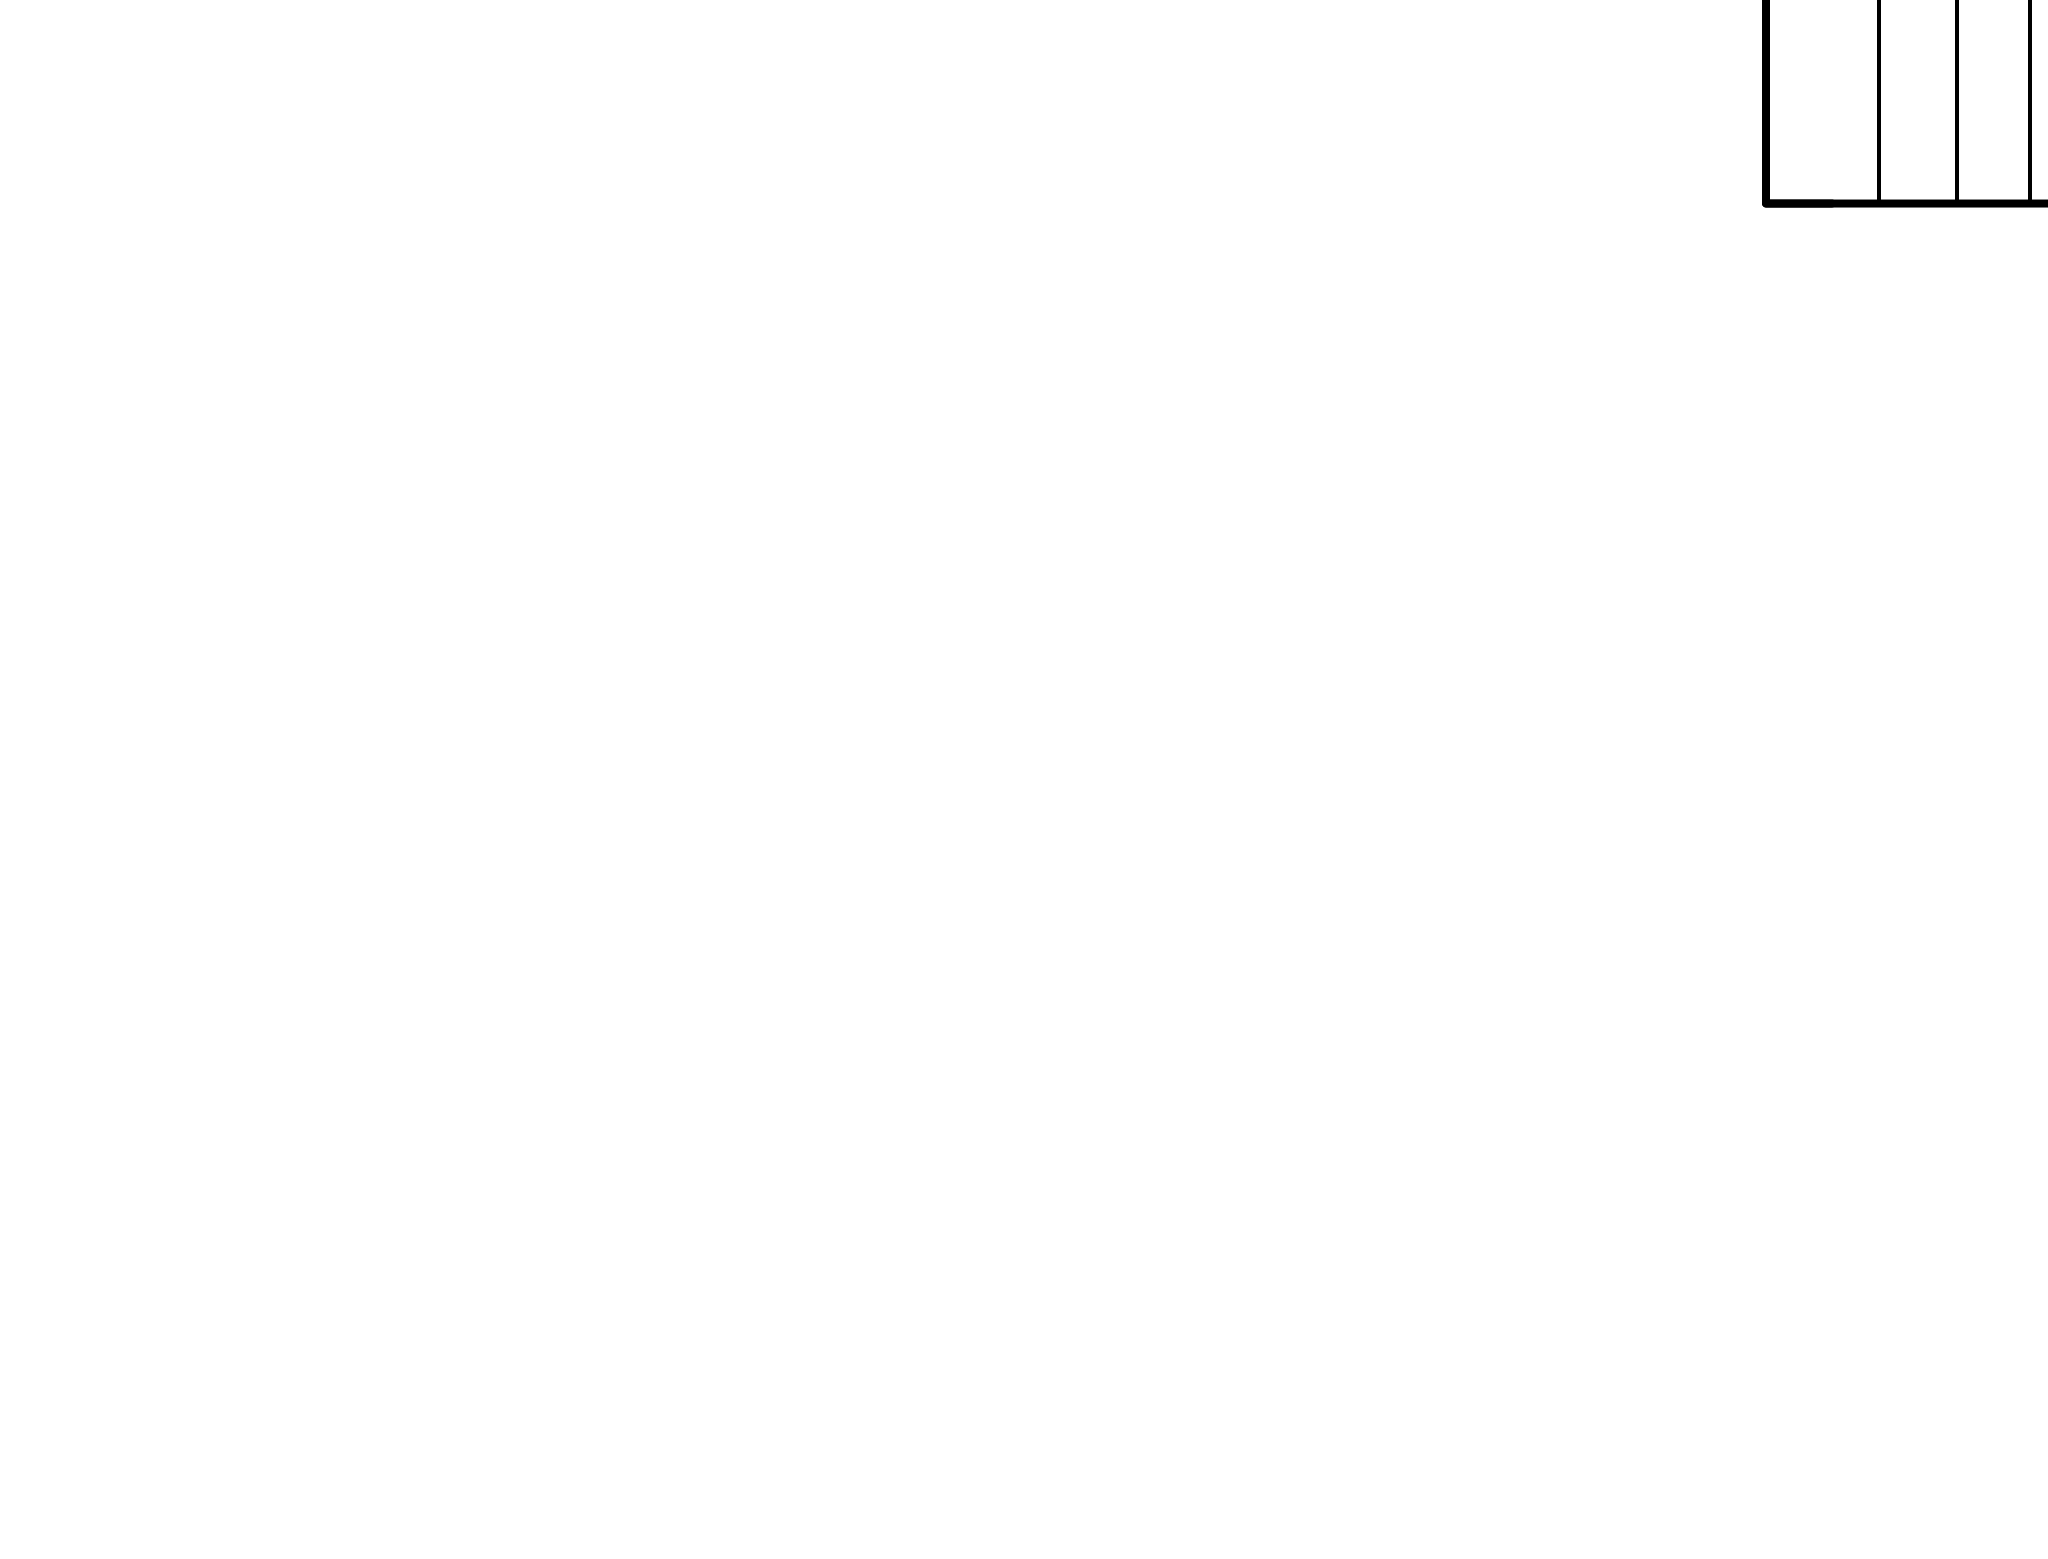

In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot.addCommand("Rescale X 0.1 15")
Plot("data")
#spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : C-Statistic (2)          3.250256e+07     using 203 bins.

T

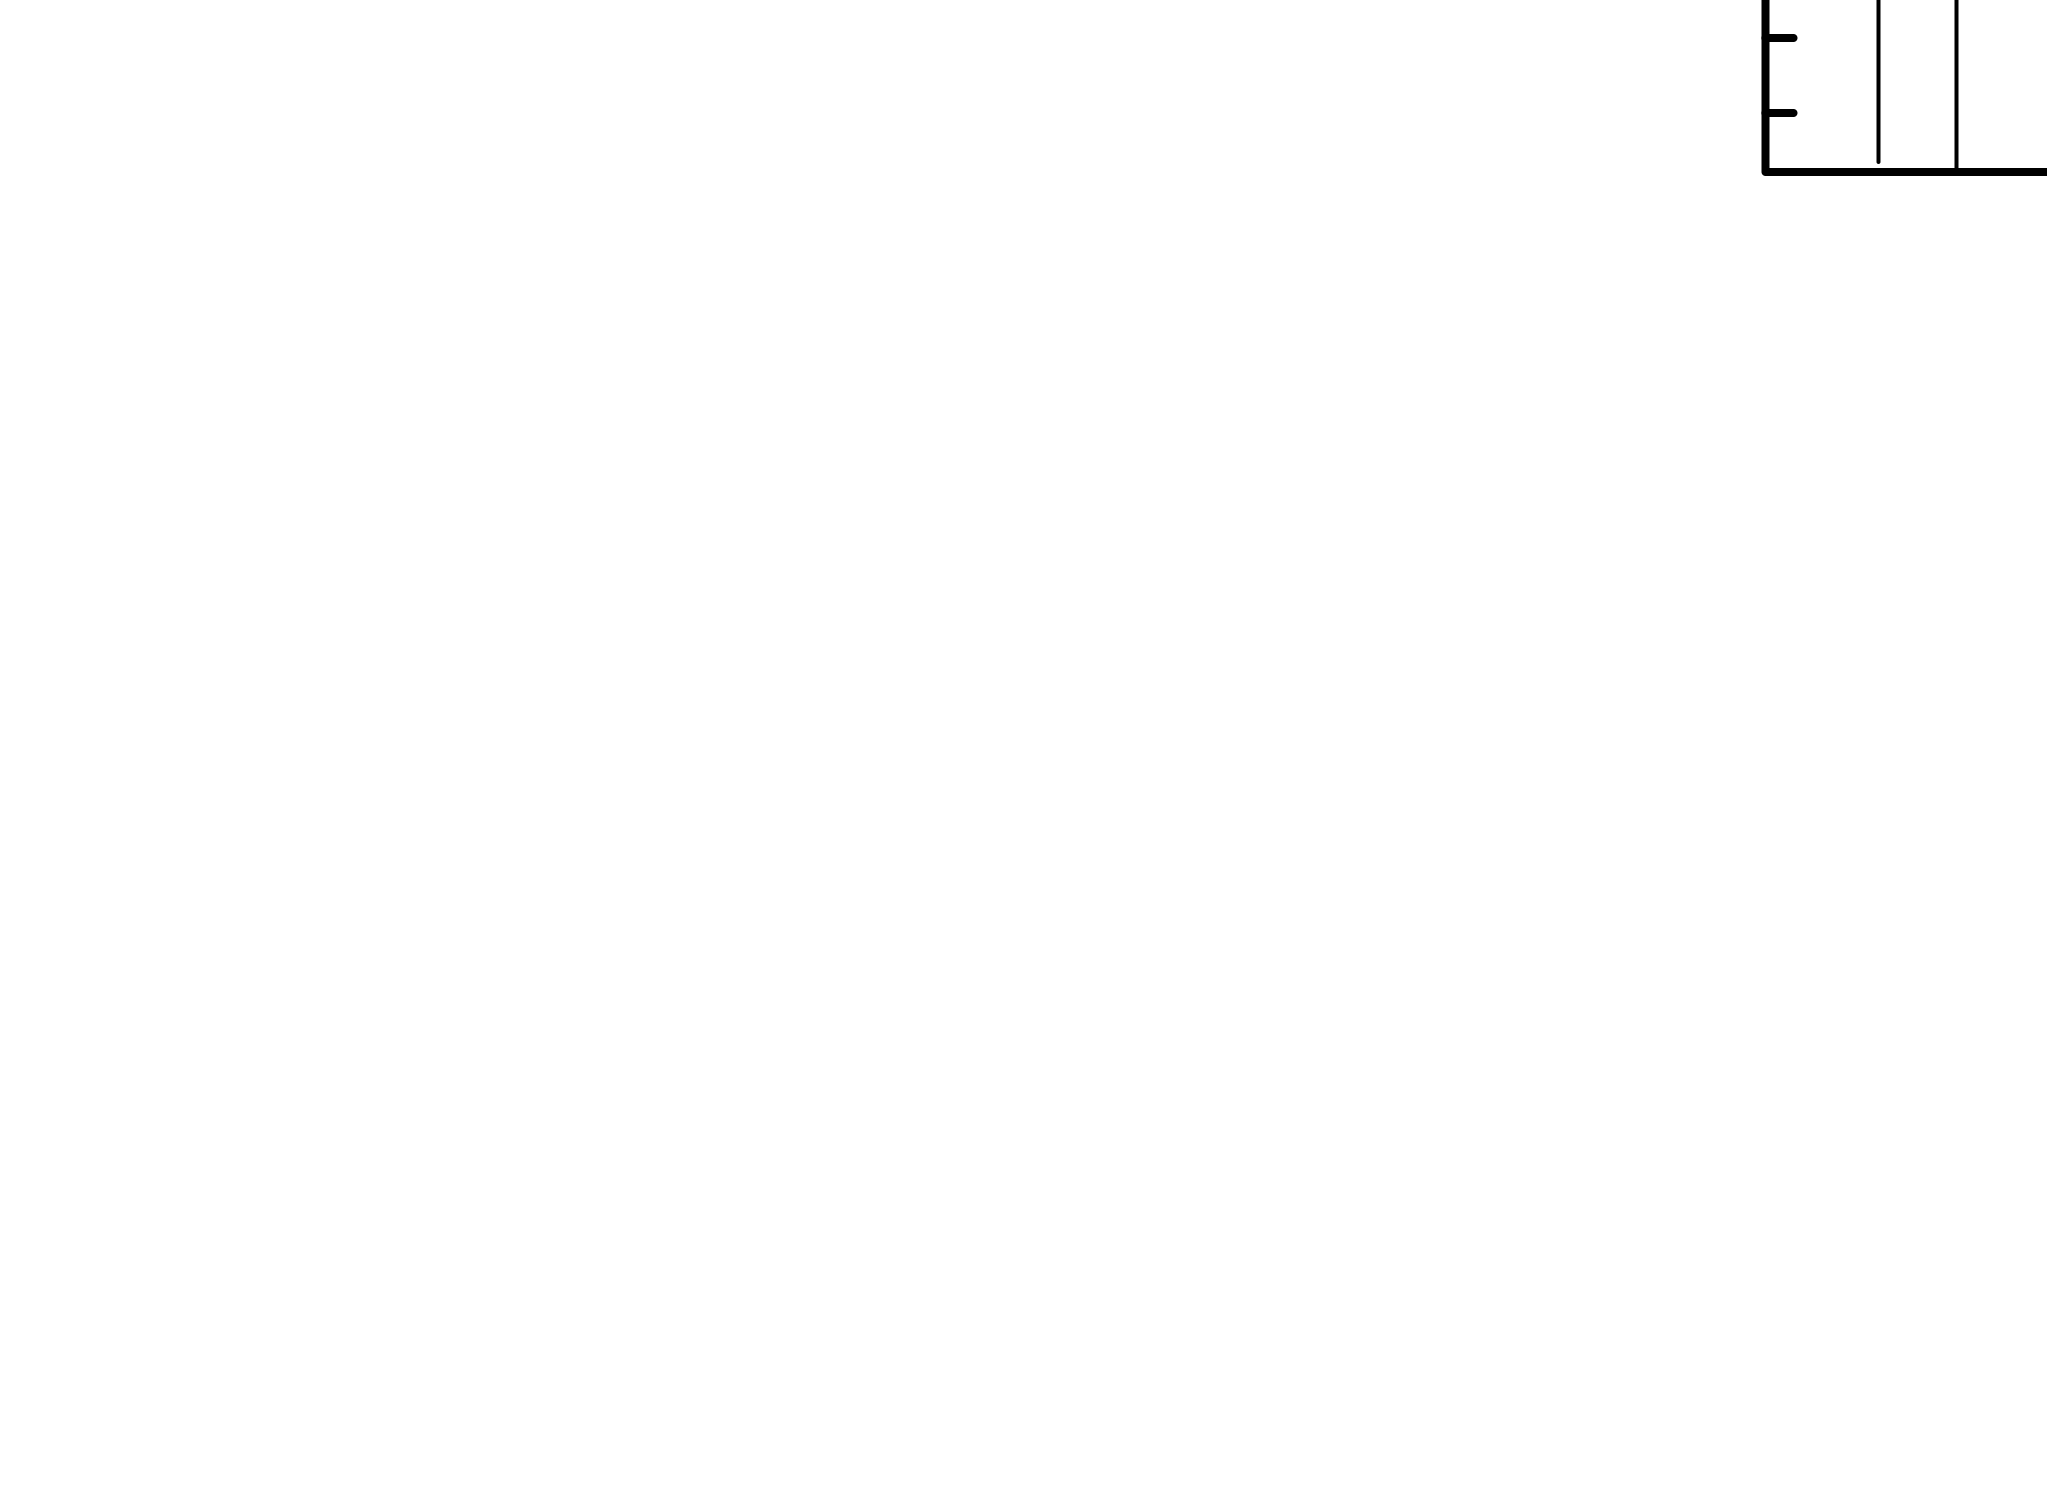

In [4]:
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

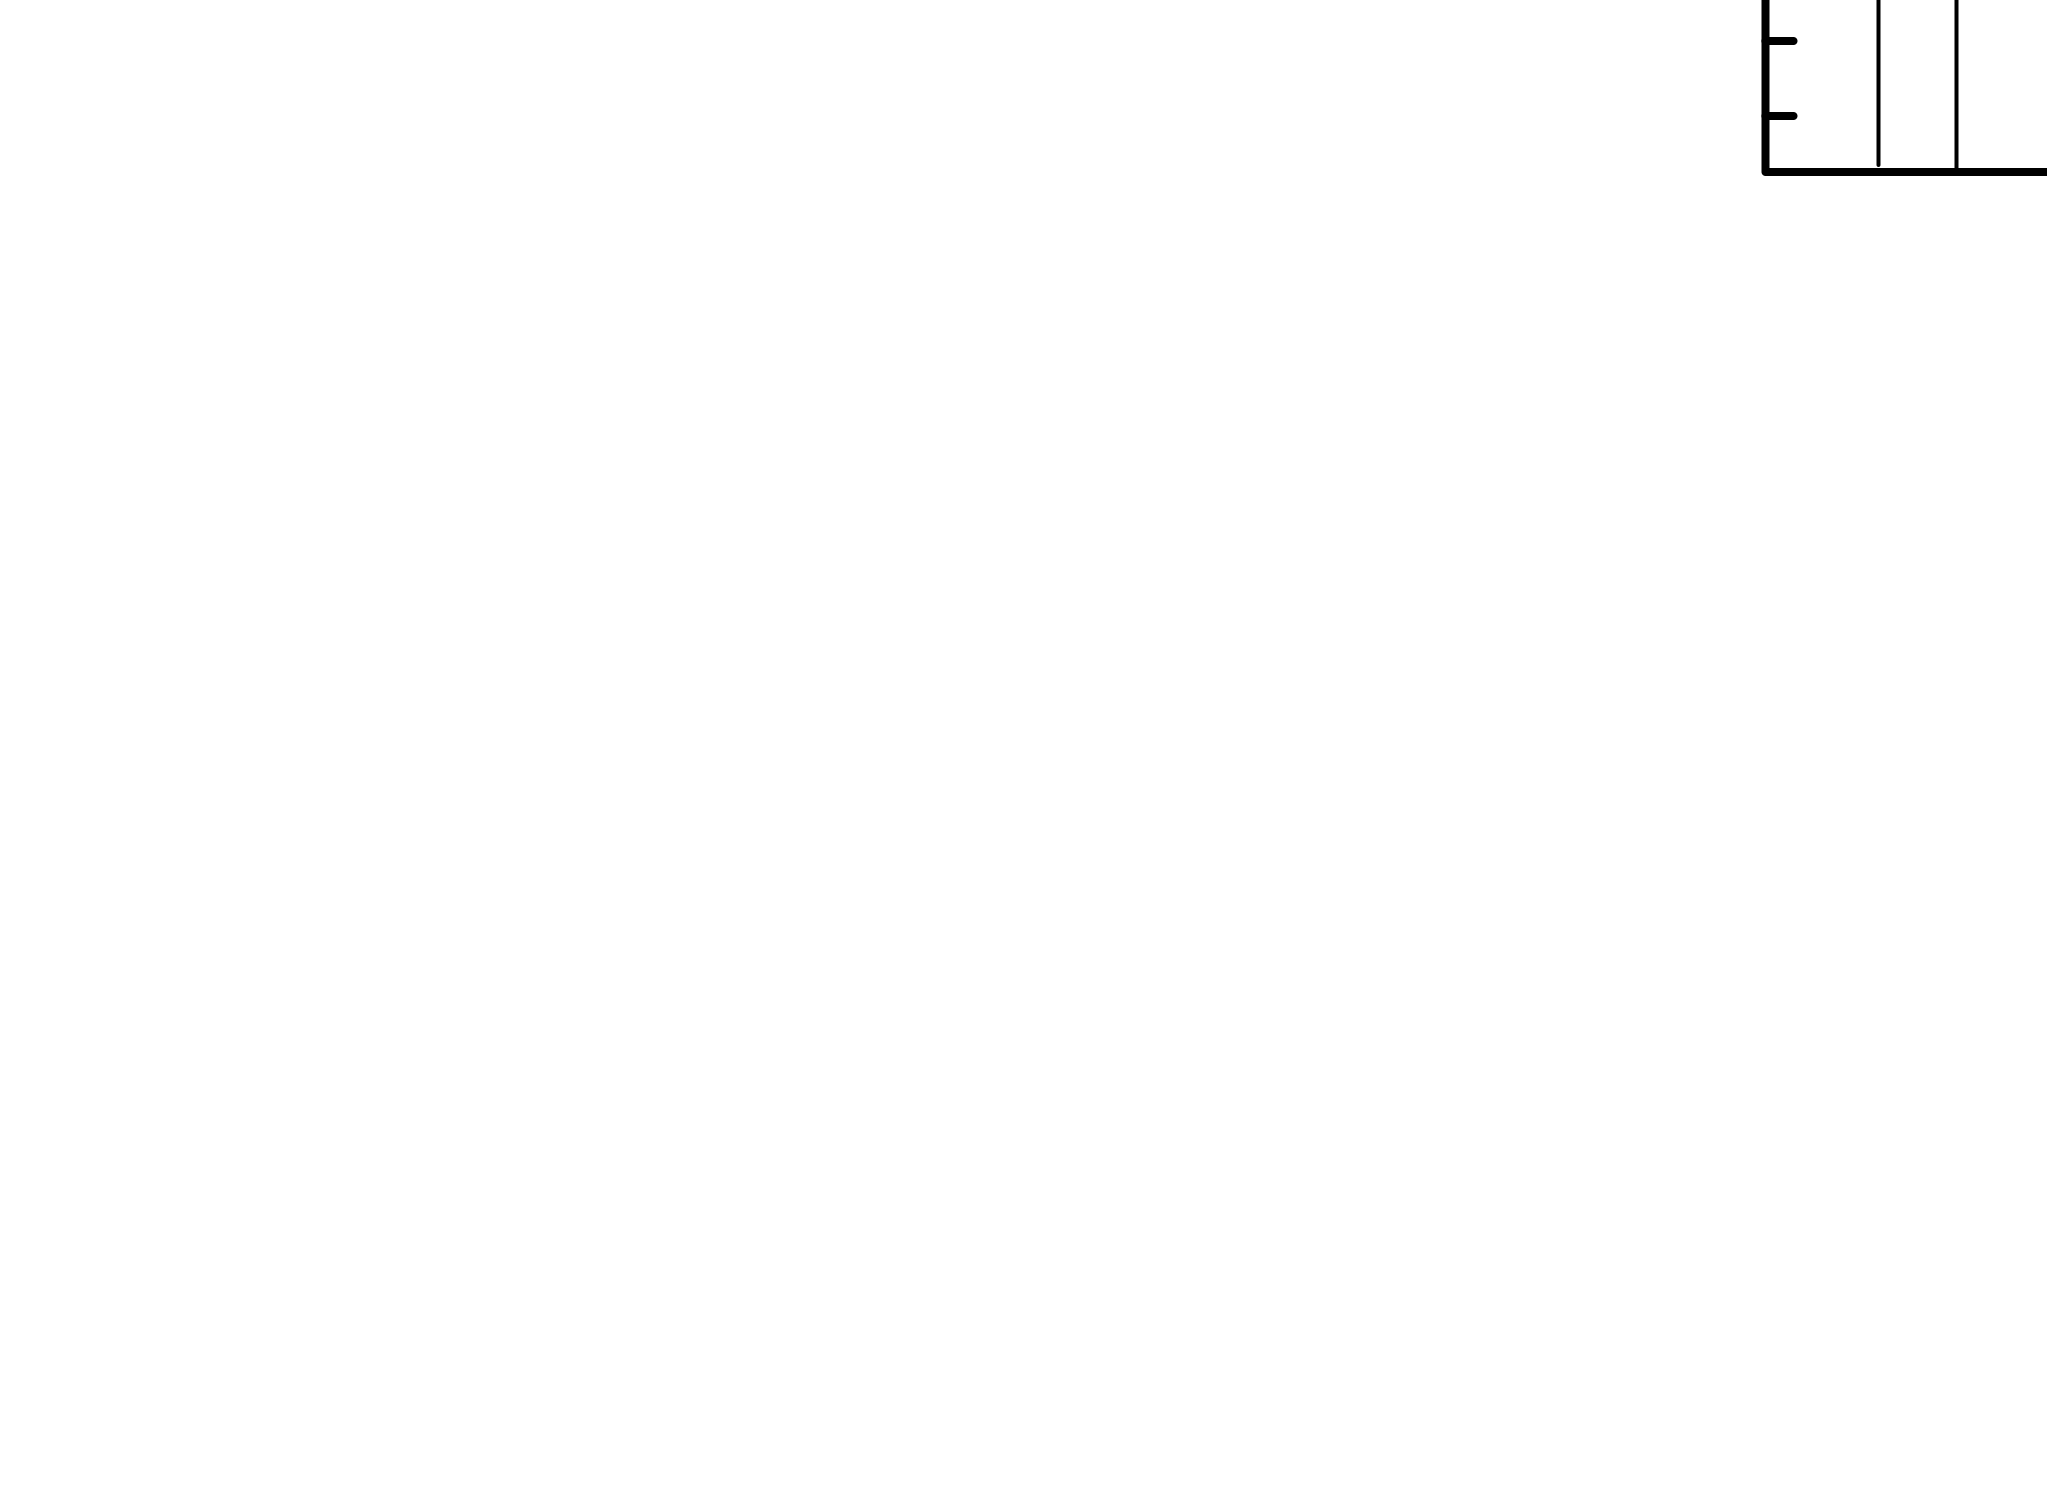


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic (2)          1.847860e+07     using 203 bins.

Test statistic : Chi-Squared              2.126343e+12     using 203 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 200 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic (2)|beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
667373       4.69416e+06   0      0.422405       6.49527     0.0945679
3836.04      1.32341e+06

In [5]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : C-Statistic (2)          7.532278e+06     using 203 bins.

Test statistic : Chi-Squared              3.832007e+11     using 203 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 200 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic (2)|beta|/N    Lvl          1:nH          2:kT        3:norm
2.33158e+06  1.39349e+06  -3      0.465208       197.683      0.375902
953512       1.06252e+06  

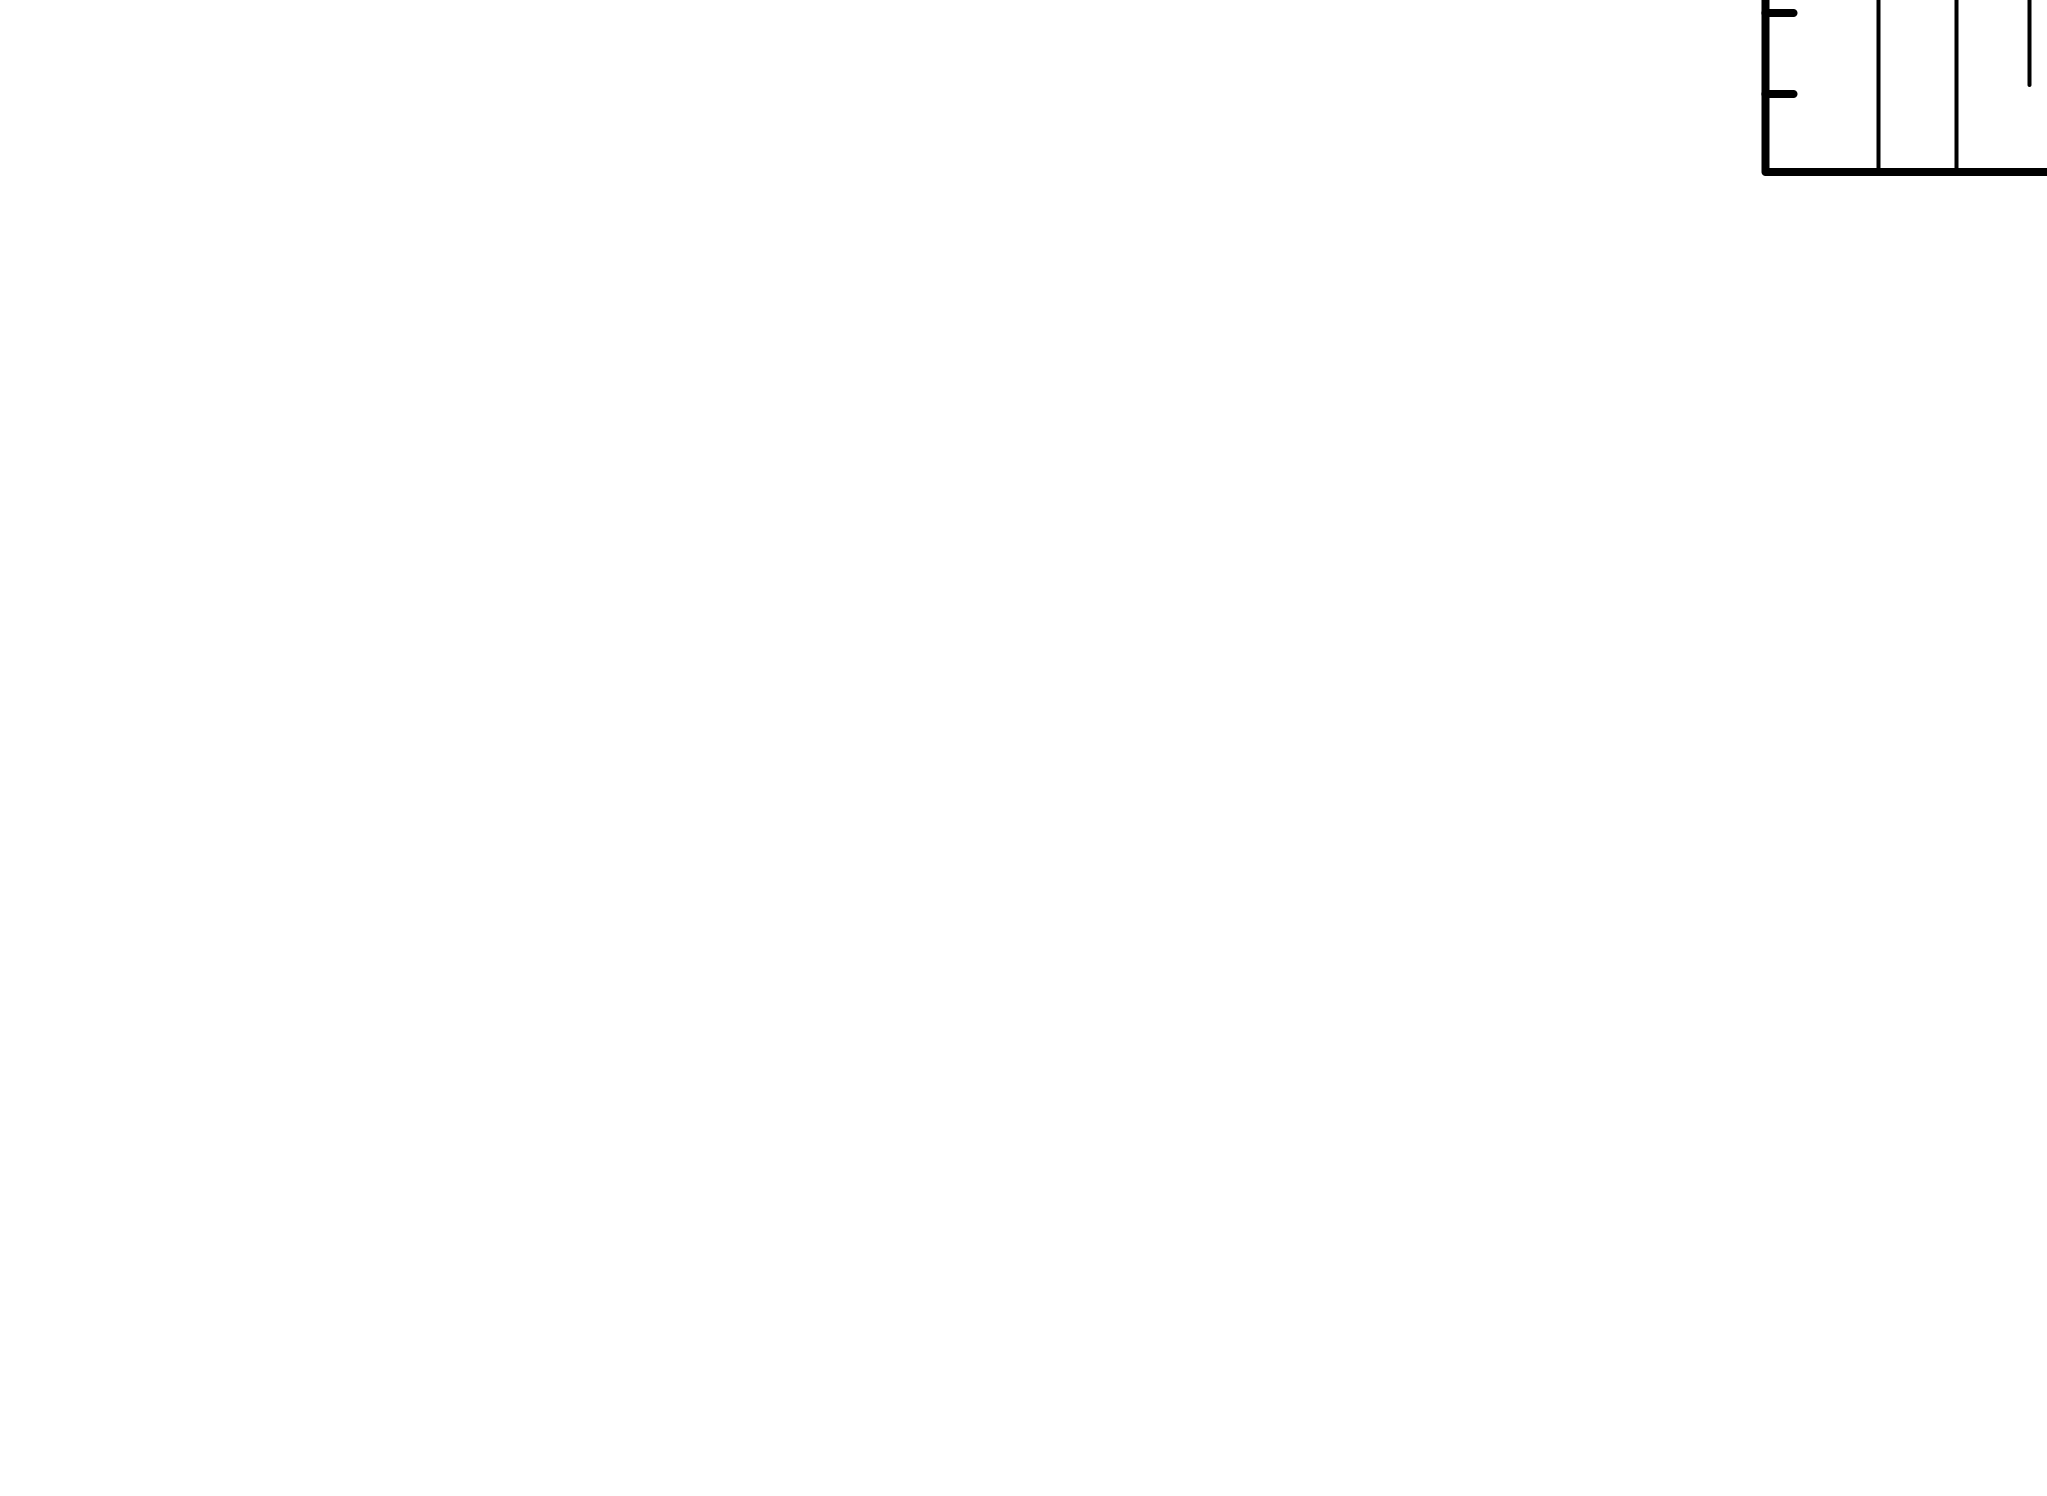

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

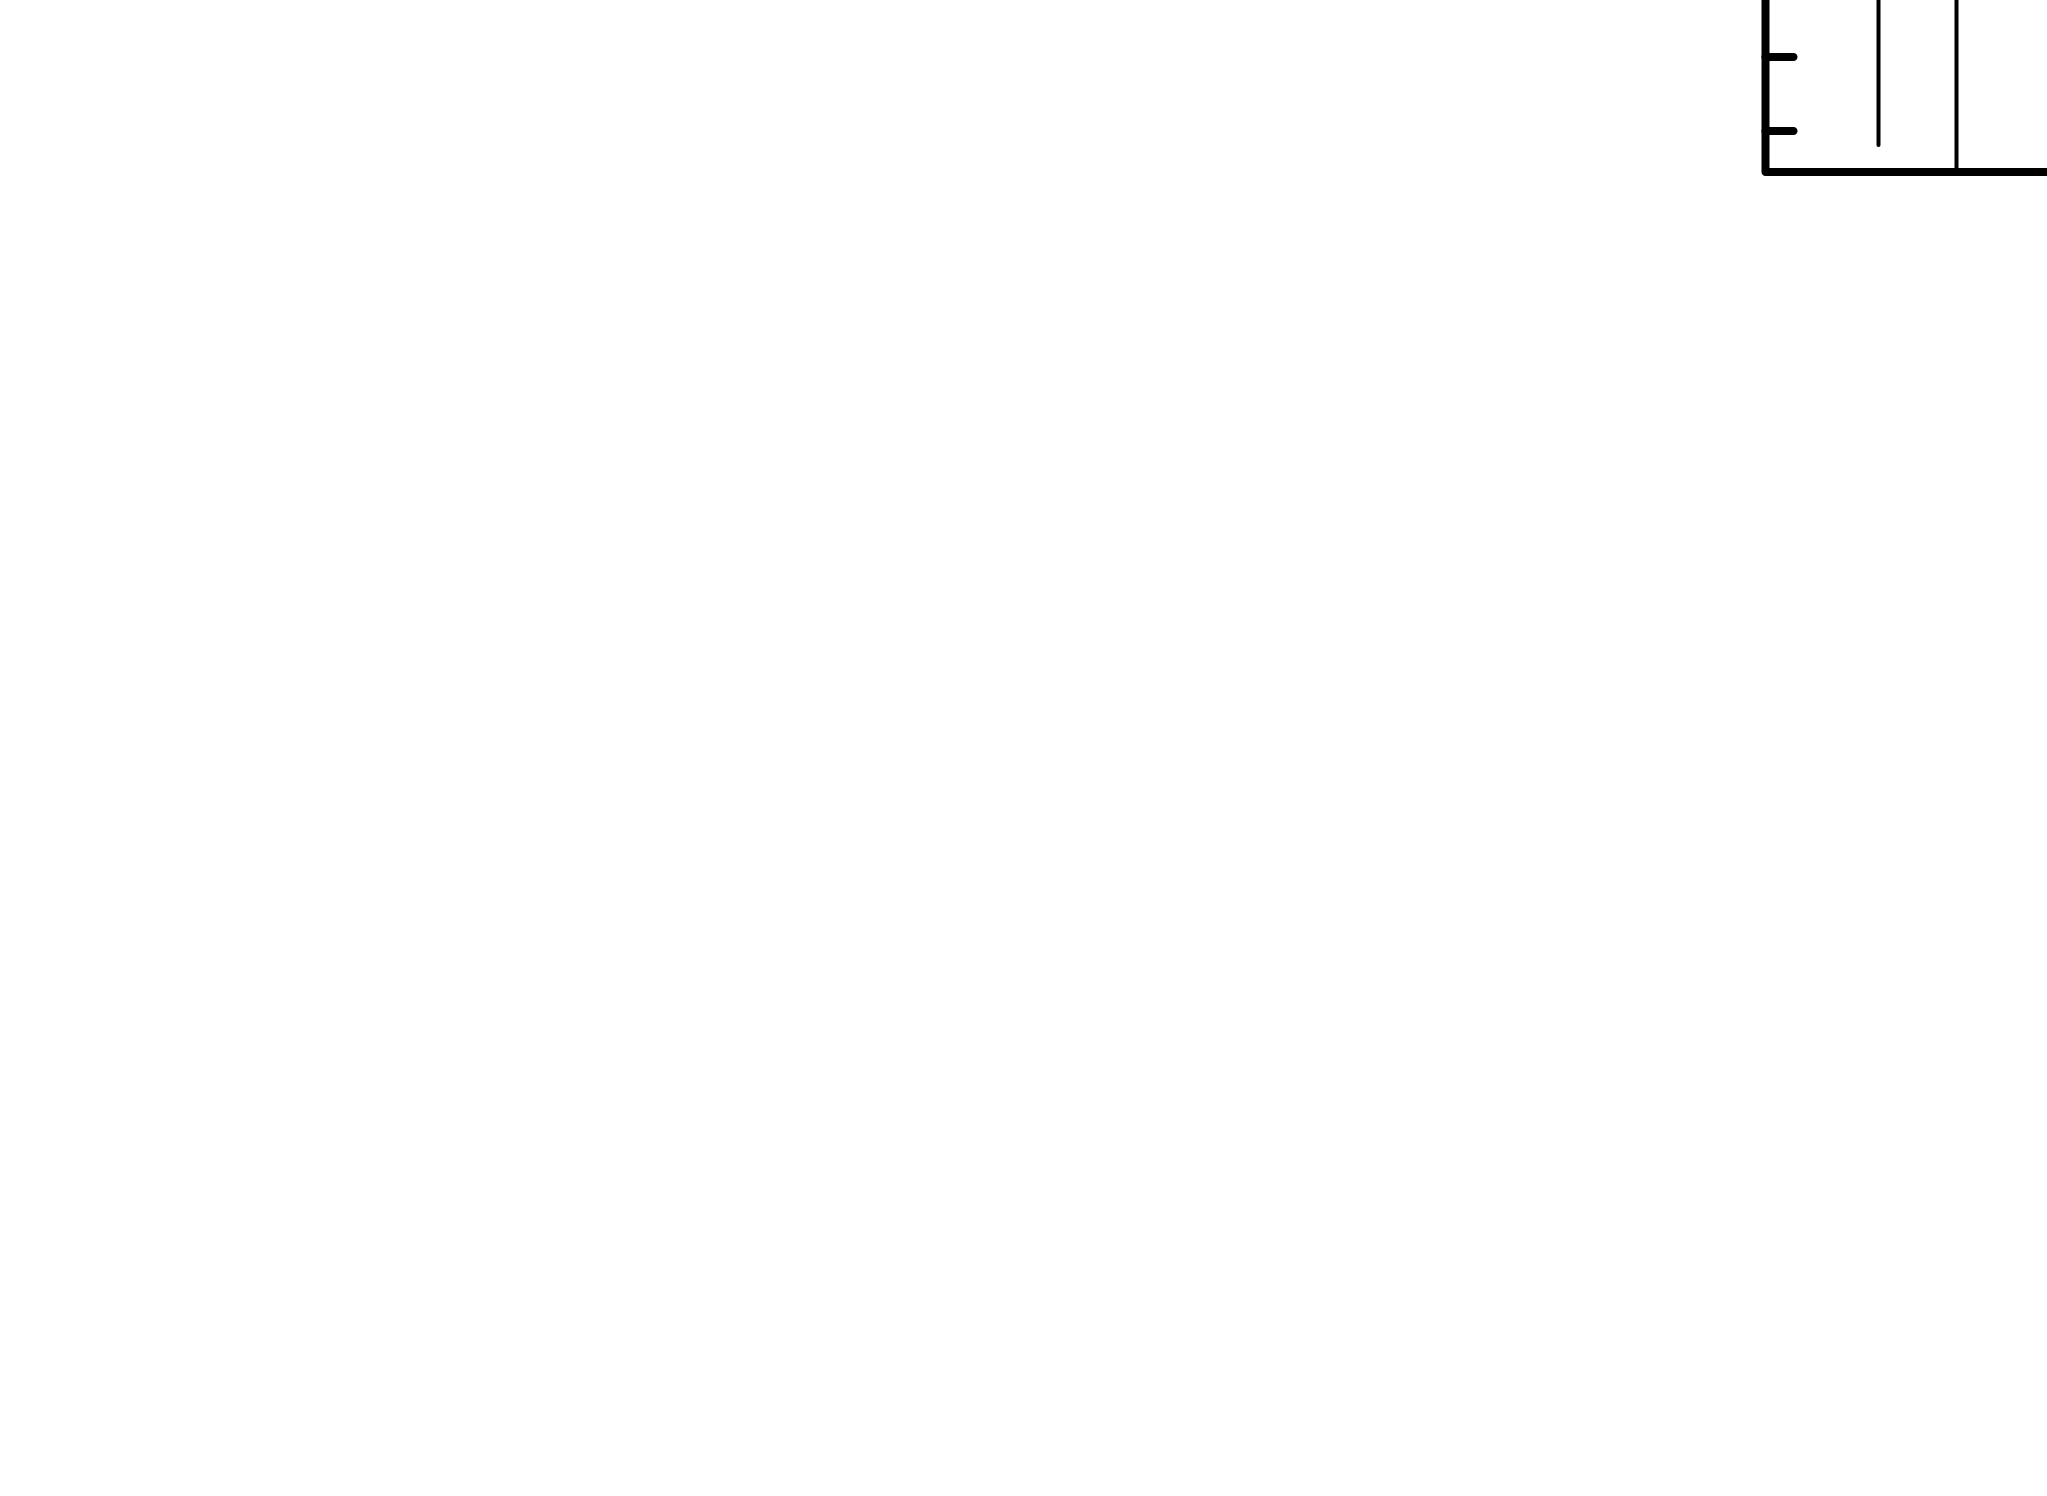


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : C-Statistic (2)          2.719465e+06     using 203 bins.

Test statistic : Chi-Squared              8.508161e+10     using 203 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.000000e+00 with 200 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
C-Statistic (2)|

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [8]:
AllModels.calcFlux(".2 12.0")

 Model Flux 9.5026e-06 photons (2.0476e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [9]:
plx = 18.6994
d_kpc = 1/plx
F_x = 2.0476*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

7.004405175785179e+27


In [10]:
import numpy as np
print(np.log10(L_x))

27.84537126027237


In [11]:
F_opt = 1.05*10**-5 * 10**(-0.4*9.6)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  1.5177117592832245e-09
F_x / F_opt:  -4.86994417819173
